In [223]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
%matplotlib inline

In [224]:
books_data = pd.read_csv(r'C:\Users\ss\Desktop\best books\books.csv',error_bad_lines=False)
books_data.head(2)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [225]:
x,y=books_data.shape
print(f'No.of rows are :- {x}')
print(f'No.of columns are :- {y}')


No.of rows are :- 11123
No.of columns are :- 12


In [226]:
books_data.size

133476

In [227]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 782.1+ KB


In [228]:
books_data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

The data doesnot contain any null values,but lets fix some things!!!

In [229]:
books_data.rename(columns={'  num_pages':'no_of_pages'},inplace=True)

In [230]:
books_data['average_rating']=books_data['average_rating'].apply(lambda x :("{:.1f}".format(x)))

In [231]:
books_data['average_rating']=books_data['average_rating'].astype('float64')

In [232]:
books_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.6,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.5,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [233]:
books_data['publication_data']=pd.to_datetime(books_data['publication_date'],dayfirst=True,errors='coerce')
books_data['day_of_publication']=books_data['publication_data'].dt.day
books_data['month_of_publication']=books_data['publication_data'].dt.month

books_data['year_of_publication']=books_data['publication_data'].dt.year


books_data['weekday_of_publication']=books_data['publication_data'].dt.dayofweek

In [234]:
books_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_data,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.6,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006-09-16,16.0,9.0,2006.0,5.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.5,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004-01-09,9.0,1.0,2004.0,4.0


In [235]:
books_data.drop(['publication_date','publication_data'],axis=1,inplace=True)

In [236]:
books_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publisher,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.6,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,16.0,9.0,2006.0,5.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.5,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,9.0,1.0,2004.0,4.0


In [237]:
books_data.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
no_of_pages               0
ratings_count             0
text_reviews_count        0
publisher                 0
day_of_publication        2
month_of_publication      2
year_of_publication       2
weekday_of_publication    2
dtype: int64

SOME OF THE ABOVE COLUMNS CONTAIN NULL VALUES SO IT CANNOT BE CONVERTED TO INT.LETS FIX IT!!

In [238]:
books_data.dropna(inplace=True)

In [239]:
books_data.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
no_of_pages               0
ratings_count             0
text_reviews_count        0
publisher                 0
day_of_publication        0
month_of_publication      0
year_of_publication       0
weekday_of_publication    0
dtype: int64

# FIXED!!!

In [240]:
books_data['month_of_publication']=books_data['month_of_publication'].apply(lambda x :int(x))
books_data['day_of_publication']=books_data['day_of_publication'].apply(lambda x :int(x))
books_data['year_of_publication']=books_data['year_of_publication'].apply(lambda x :int(x))
books_data['weekday_of_publication']=books_data['weekday_of_publication'].apply(lambda x :int(x))

#books_data['day_of_publication'].astype('int32')
#books_data['year_of_publication'].astype('int32')
#books_data['weekday_of_publication'].astype('int32')


In [241]:
books_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publisher,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.6,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,16,9,2006,5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.5,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,9,1,2004,4


# DATA ANALYSIS

In [242]:
books_data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'no_of_pages', 'ratings_count', 'text_reviews_count',
       'publisher', 'day_of_publication', 'month_of_publication',
       'year_of_publication', 'weekday_of_publication'],
      dtype='object')

In [243]:
books_data['authors'].value_counts()

P.G. Wodehouse                                               40
Stephen King                                                 40
Rumiko Takahashi                                             39
Orson Scott Card                                             35
Agatha Christie                                              33
                                                             ..
Robert  Evans                                                 1
David Day                                                     1
Søren Kierkegaard/Howard Vincent Hong/Edna Hatlestad Hong     1
Horace/David   West                                           1
Alexandre Dumas/Barbara T. Cooper                             1
Name: authors, Length: 6638, dtype: int64

There are around 6638 authors taking in the consideration they have written atleast 1 book.Now lets see the top 10 authors with most no of books.

In [244]:
authors_with_most_no_of_books=books_data['authors'].value_counts().head(10)

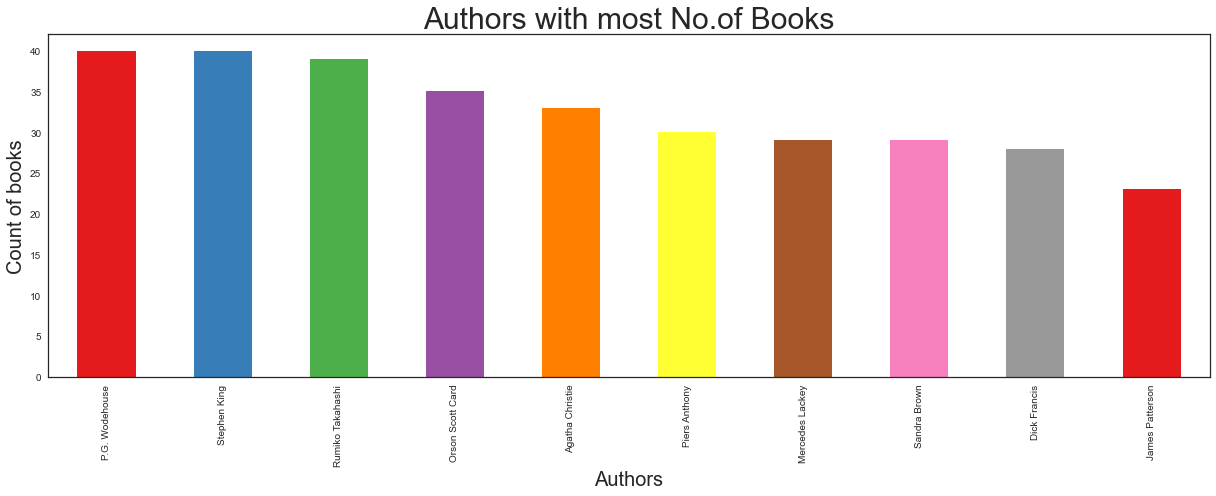

In [245]:
plt.rcParams['figure.figsize']=17,7
plt.style.use('seaborn-white')
authors_with_most_no_of_books.plot.bar(color=sbn.color_palette('Set1'))
plt.xlabel('Authors',fontsize=20)
plt.ylabel('Count of books',fontsize=20)
plt.title('Authors with most No.of Books',fontsize=30)
plt.tight_layout()
plt.show()

In [246]:
books_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publisher,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.6,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,16,9,2006,5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.5,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,9,1,2004,4


# AVERAGE RATING

In [247]:
books_data['average_rating'].value_counts()

4.0    1823
3.9    1573
3.8    1329
4.1    1317
4.2    1249
3.7     826
4.3     704
3.6     606
3.5     428
4.4     355
3.4     234
4.5     199
3.3     113
4.6      79
3.2      73
3.1      49
3.0      29
0.0      25
4.7      23
5.0      22
2.8      18
2.9      13
4.8       8
2.0       6
2.7       5
2.6       5
4.9       3
1.0       2
2.5       2
1.7       1
2.4       1
2.3       1
Name: average_rating, dtype: int64

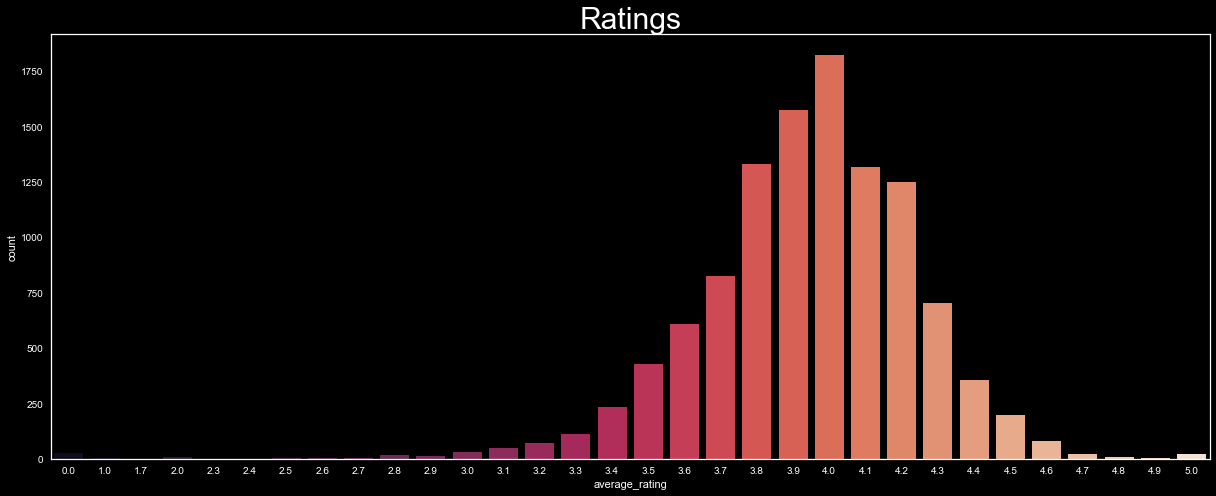

In [248]:
plt.style.use('dark_background')
sbn.countplot(x='average_rating',data=books_data,palette='rocket')
plt.title('Ratings',fontsize=30)
plt.tight_layout()
plt.show()

In [249]:
books_data.average_rating.median()

4.0

LETS SEE THE TOP RATED BOOKS!!

In [250]:
top_rated_books = books_data.nlargest(10,'average_rating')
top_rated_books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publisher,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,Oxford University Press USA,22,2,1922,2
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,Schirmer Mosel,9,1,2006,0
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,Teaching Resources,1,1,2002,1
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,Arcadia Publishing,17,3,2003,0
4125,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,BradyGames,3,6,2003,1
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,Square One Publishers,2,1,2006,0
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,Vantage Press,1,1,1975,2
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,Boosey & Hawkes Inc,6,1,2004,1
5474,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,BBC Physical Audio,4,1,1996,3
5476,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,0563388323,9780563388326,eng,2,2,0,BBC Physical Audio,10,2,1995,4


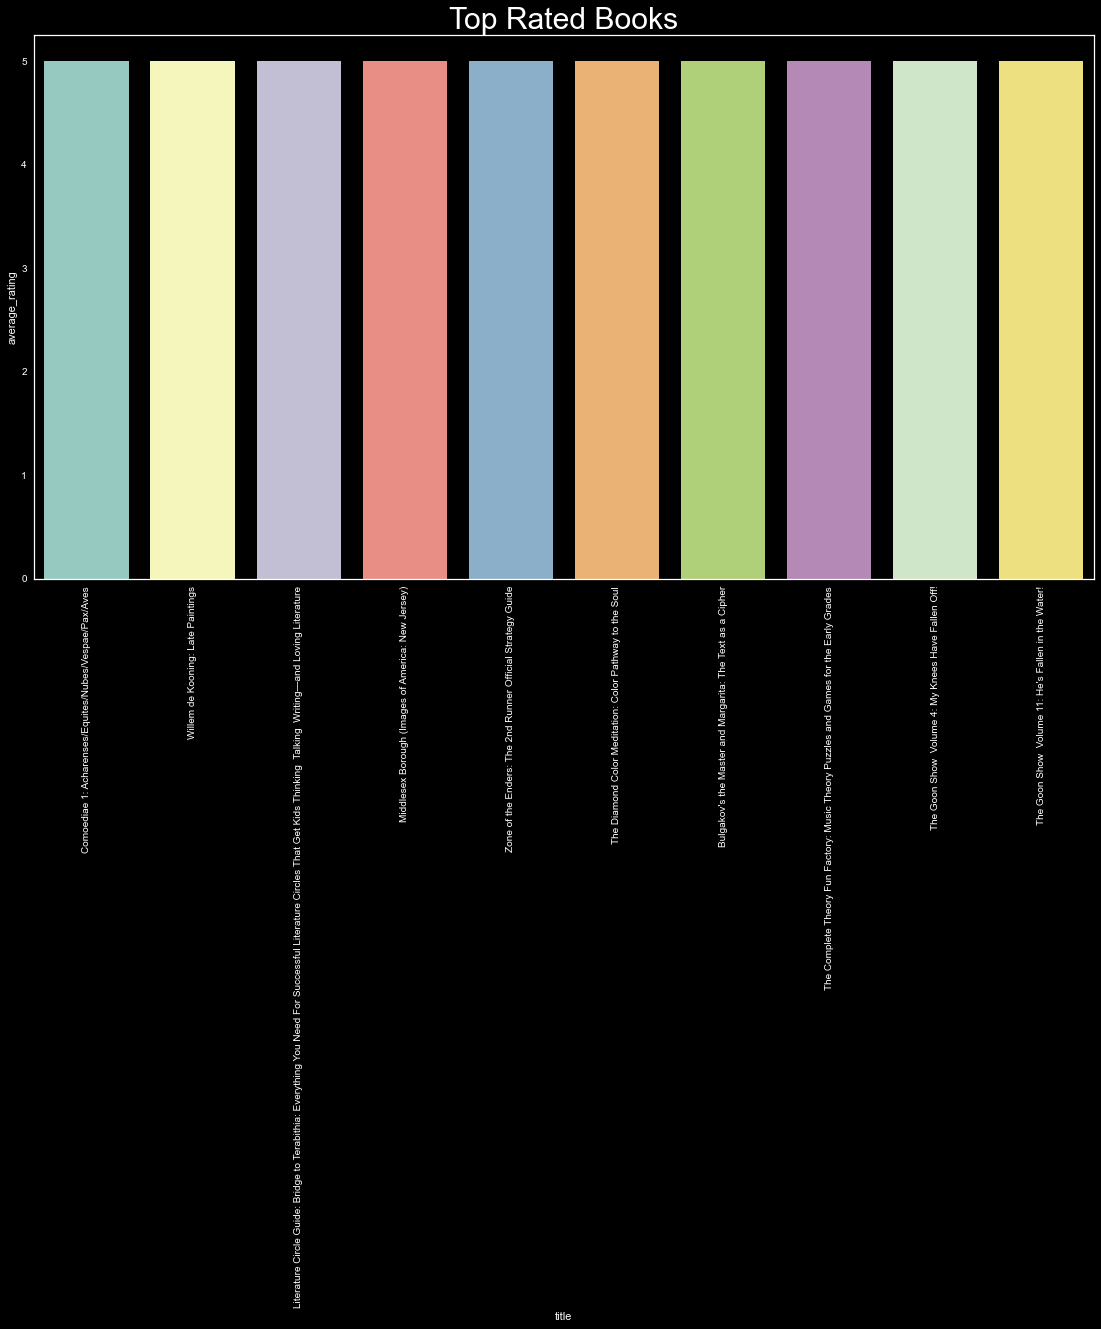

In [251]:
plt.rcParams['figure.figsize']=19,10
sbn.barplot(x='title',y='average_rating',data=top_rated_books)
plt.xticks(rotation=90)
plt.title('Top Rated Books',fontsize=30)
plt.show()

# LANGUAGE

In [252]:
books_data.language_code.value_counts()

eng      8907
en-US    1408
spa       218
en-GB     214
fre       143
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
gla         1
wel         1
msa         1
ara         1
nl          1
tur         1
nor         1
srp         1
glg         1
ale         1
Name: language_code, dtype: int64

There are many languages but lets see the top 5 languages

In [253]:
top_5_lang = books_data.language_code.value_counts().head(5)
top_5_lang

eng      8907
en-US    1408
spa       218
en-GB     214
fre       143
Name: language_code, dtype: int64

In [254]:
lang=['eng','en-US','spa','en-GB','fre']

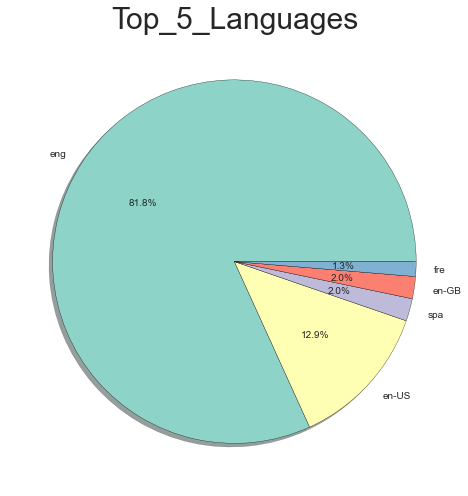

In [255]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=7,7
plt.pie(top_5_lang,shadow=True,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',colors=sbn.color_palette('Set3'),labels=lang)
plt.title('Top_5_Languages',fontsize=30)
plt.tight_layout()
plt.show()

So books in English language are published more..

# NO OF PAGES

In [256]:
most_pages = books_data.nlargest(10,'no_of_pages')
most_pages

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publisher,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.7,039306011X,9780393060119,eng,6576,1338,81,W. W. Norton Company,17,10,2004,6
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.5,039541685X,9780395416853,eng,4736,1493,99,Mariner Books,5,9,1986,4
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.3,0701125594,9780701125592,eng,3400,6,1,Chatto & Windus,3,5,1981,6
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.7,0439827604,9780439827607,eng,3342,28242,808,Scholastic,9,12,2005,4
6822,25709,Summa Theologica 5 Vols,Thomas Aquinas,4.1,0870610635,9780870610639,eng,3020,2734,84,Christian Classics,1,1,1981,3
7862,30258,Harrison's Principles of Internal Medicine,Dennis L. Kasper/Dan L. Longo/Stephen L. Hause...,4.3,0071391401,9780071391405,eng,2751,23,4,McGraw-Hill Medical Publishing,27,7,2004,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.8,0439682584,9780439682589,eng,2690,41428,164,Scholastic,13,9,2004,0
10749,43888,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.3,0812575601,9780812575606,en-US,2480,4196,81,Tor Books,15,11,1998,6
6257,23589,The J.R.R. Tolkien Companion and Guide,Christina Scull/Wayne G. Hammond,4.6,0618391134,9780618391134,eng,2264,45,0,Houghton Mifflin Harcourt,11,2,2006,5
5614,20749,Study Bible: NIV,Anonymous,4.7,0310929555,9780310929550,eng,2198,4166,186,Zondervan Publishing House,10,1,2002,3


Let's visualize the data....

c:\users\ss\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


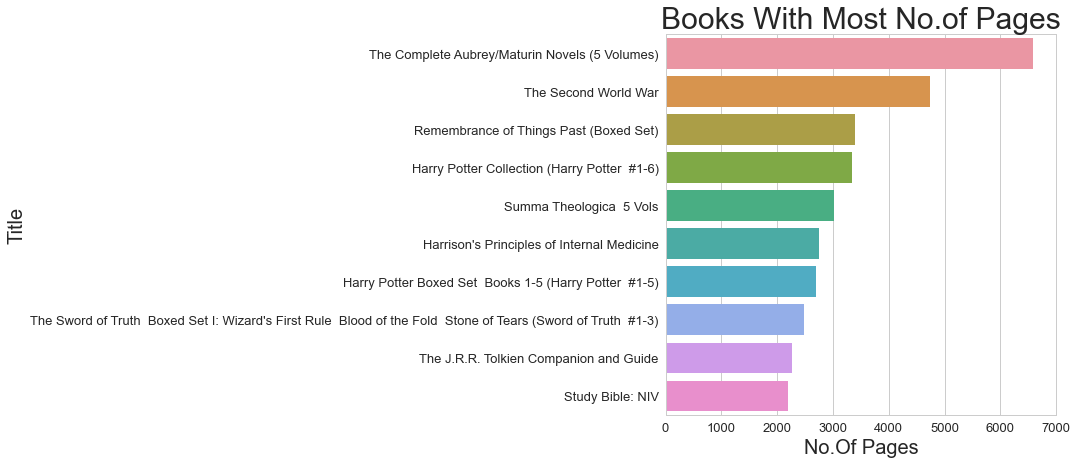

In [260]:
plt.style.use('seaborn-whitegrid')
sbn.barplot(x='no_of_pages',y='title',data=most_pages)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('No.Of Pages',fontsize=20)
plt.ylabel('Title',fontsize=20)
plt.xlim(0,7000)
plt.title('Books With Most No.of Pages',fontsize=30)

plt.tight_layout()
plt.show()

In [261]:
books_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publisher,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.6,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,16,9,2006,5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.5,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,9,1,2004,4


# NO.OF RATINGS

In [264]:
no_of_ratings=books_data[['title','ratings_count']].sort_values('ratings_count',ascending=False).head(10)
no_of_ratings

,title,ratings_count
10336,Twilight (Twilight #1),4597666
1697,The Hobbit or There and Back Again,2530894
1462,The Catcher in the Rye,2457092
307,Angels & Demons (Robert Langdon #1),2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,2293963
1,Harry Potter and the Order of the Phoenix (Har...,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,2128944
2114,Animal Farm,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,2095690


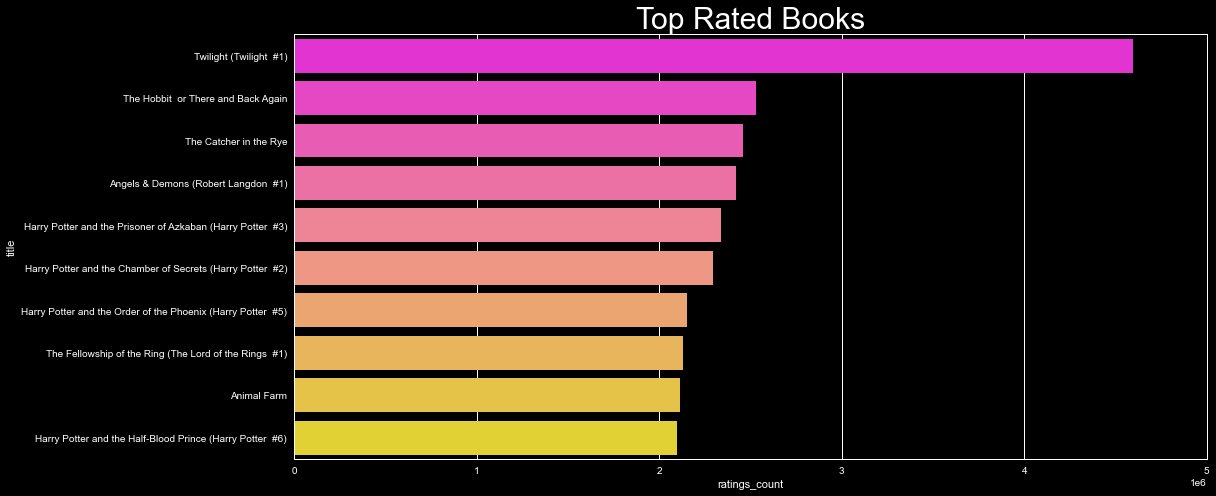

In [273]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=17,7
sbn.barplot(x='ratings_count',y='title',data=no_of_ratings,palette='spring')
plt.title('Top Rated Books',fontsize=30)
plt.xlim(0,5000000)
plt.tight_layout()
plt.show()

So,here we can see that Twilight is the book with most no of ratings.But it can also be seen that readers and book lovers are huge harry potter fans with 4 Harry Potter books in this list.


NOTE:- Rating Count in millions

# REVIEW COUNT

In [275]:
most_reviewed = books_data[['title','text_reviews_count']].sort_values('text_reviews_count',ascending=False).head(10)
most_reviewed


,title,text_reviews_count
10336,Twilight (Twilight #1),94265
5270,The Book Thief,86881
1069,The Giver (The Giver #1),56604
284,The Alchemist,55843
10700,Water for Elephants,52759
7309,The Lightning Thief (Percy Jackson and the Oly...,47951
5407,Eat Pray Love,47620
2060,The Glass Castle,46176
1462,The Catcher in the Rye,43499
3,Harry Potter and the Prisoner of Azkaban (Harr...,36325


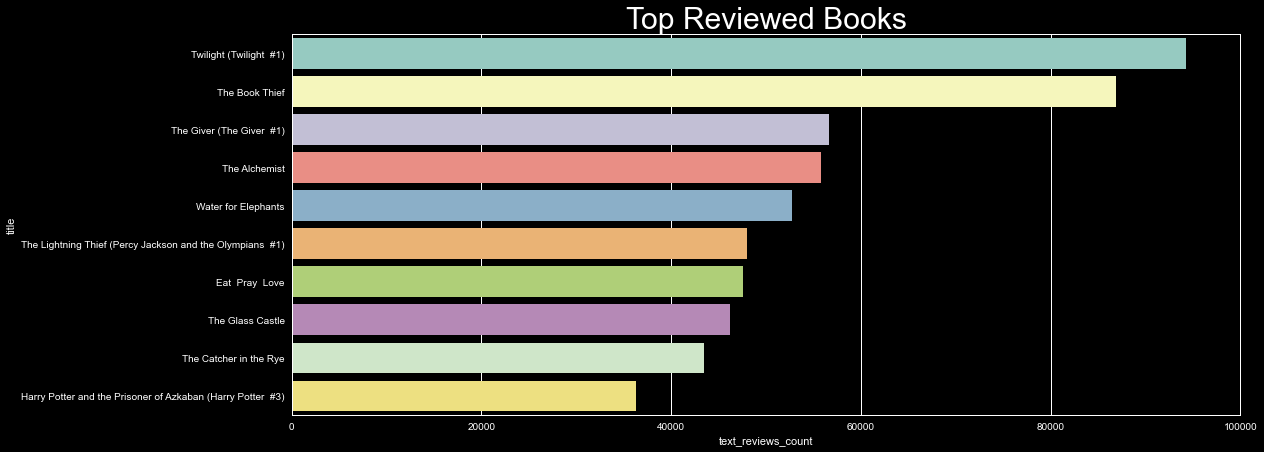

In [279]:
sbn.barplot(x='text_reviews_count',y='title',data=most_reviewed)
plt.title('Top Reviewed Books',fontsize=30)
plt.xlim(0,100000)
plt.show()

Again Twilight tops the list...It seems as readers loves this book.It's both Top-Rated and Top-Reviewed book.The book is must read for any book lover.

# PUBLISHER

In [281]:
books_data.publisher.value_counts()

Vintage                           318
Penguin Books                     261
Penguin Classics                  184
Mariner Books                     150
Ballantine Books                  144
                                 ... 
Walker                              1
WaterBrook                          1
Harpercollins Children's Books      1
Feminist Press                      1
Union Square Press                  1
Name: publisher, Length: 2289, dtype: int64

In [282]:
#There are number of publishers lets see top 10 pulishers

In [292]:
top_publishers=books_data.publisher.value_counts().head(10)
top_publishers

Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
HarperCollins       112
Harper Perennial    112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64

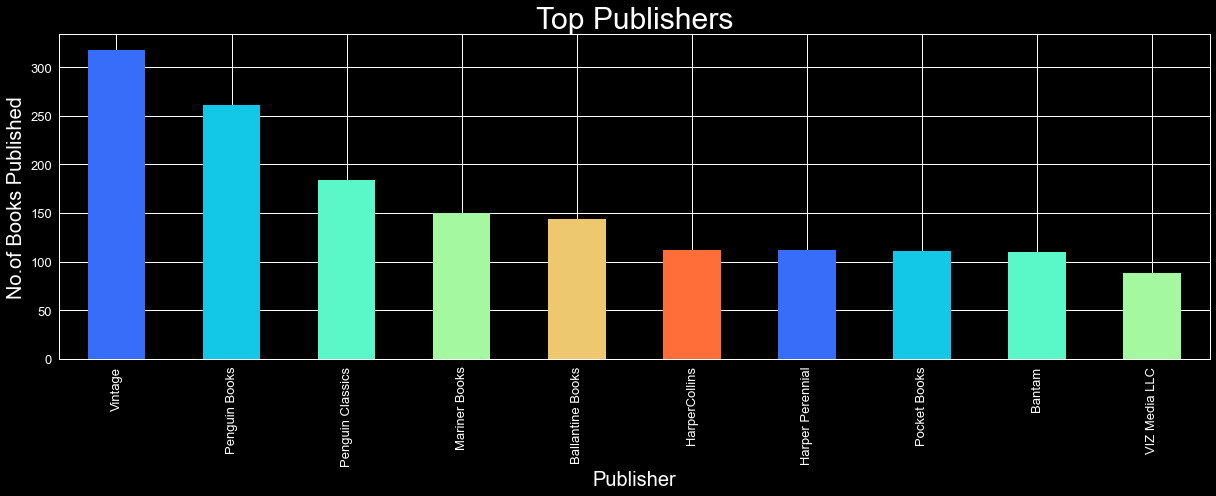

In [297]:
top_publishers.plot.bar(color=sbn.color_palette('rainbow'))
plt.xlabel('Publisher',fontsize=20)
plt.ylabel('No.of Books Published',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Top Publishers',fontsize=30)
plt.tight_layout()
plt.show()

Vintage and Penguin Publications are famous Publishers.Combinely they have published 400+ books.They are two of the most famous Publishers in the book market..

In [300]:
books_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,no_of_pages,ratings_count,text_reviews_count,publisher,day_of_publication,month_of_publication,year_of_publication,weekday_of_publication
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.6,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,16,9,2006,5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.5,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,9,1,2004,4


In [313]:
top_years=books_data['year_of_publication'].value_counts().head(10)
top_years

2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     533
2007     518
1999     450
1998     396
Name: year_of_publication, dtype: int64

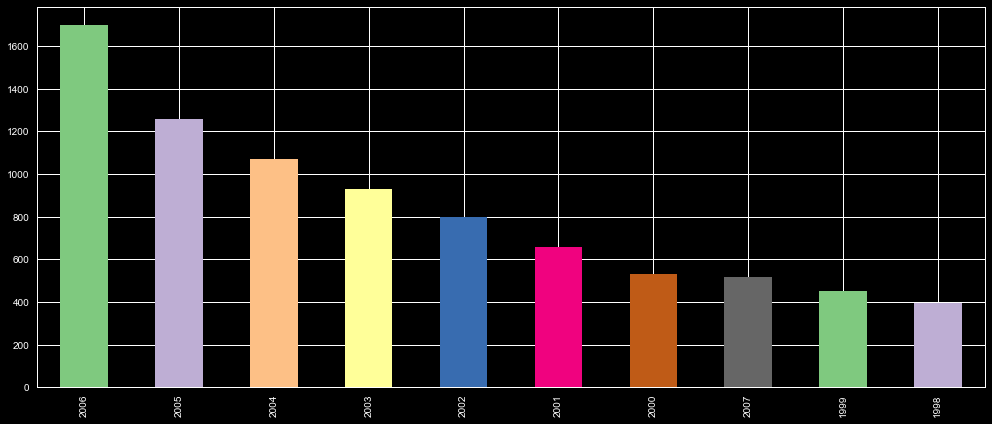

In [315]:
top_years.plot.bar(color=sbn.color_palette('Accent'))
plt.show()

# SUCCESSFULLY DONE!!!!!